# ggplot 610 - small multiples with facet grid

This notebook shows how a number of similar plots can be put in a grid.  

facet_grid implements the [small multiple](https://en.wikipedia.org/wiki/Small_multiple) concept for plots that vary on two variables.

# 0 - setup notebook

In [101]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data 

In [102]:
hdi = pd.read_csv('./dat/country.csv', index_col=0 )

hdi.head()

,region,country,HDI,trust,demo,HDI_cat
1,Southern Europe,Albania,0.749,51.2,5.67,M
2,Northern Africa,Algeria,0.713,38.6,3.83,M
4,South America,Argentina,0.811,40.4,6.84,H
5,Western Asia,Armenia,0.729,21.2,4.09,M
6,Oceania,Australia,0.938,103.6,9.22,H


### data dictionary

- HDI: human development index [0, 1]
- HDI_cat: HDI category Low, Medium, High [L,M,H]
- trust: trust in others [0, 150]
- demo: democracy index [0, 10] higher is more democratic

## 1.1 transform data

In [103]:
hdi['region'].unique()

array(['Southern Europe', 'Northern Africa', 'South America',
       'Western Asia', 'Oceania', 'Western Europe', 'Southern Asia',
       'Eastern Europe', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Northern America', 'Eastern Asia',
       'Central America', 'Northern Europe', 'Caribbean', 'Eastern Africa',
       'Central Asia'], dtype=object)

In [104]:
def get_continent(region):
    if   region.find('Europe'   ) > 0 : return 'Europe'
    elif region.find('Africa'   ) > 0 : return 'Africa'
    elif region.find('America'  ) > 0 : return 'America'
    elif region.find('Asia'     ) > 0 : return 'Asia'
    else: return None
    
hdi['continent'] = hdi['region'].apply(get_continent)
#--- remove all cases where continent=None ----
hdi = hdi.dropna(axis=0,how='any')

hdi.head()

,region,country,HDI,trust,demo,HDI_cat,continent
1,Southern Europe,Albania,0.749,51.2,5.67,M,Europe
2,Northern Africa,Algeria,0.713,38.6,3.83,M,Africa
4,South America,Argentina,0.811,40.4,6.84,H,America
5,Western Asia,Armenia,0.729,21.2,4.09,M,Asia
7,Western Europe,Austria,0.895,70.2,8.62,H,Europe


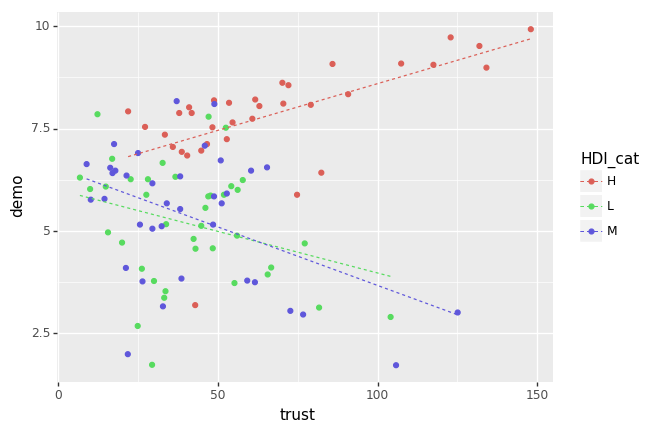

<ggplot: (14313799)>

In [105]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo', color='HDI_cat')) + \
    geom_point() + \
    geom_smooth(method='lm', se=False, size=0.5, linetype='dotted')

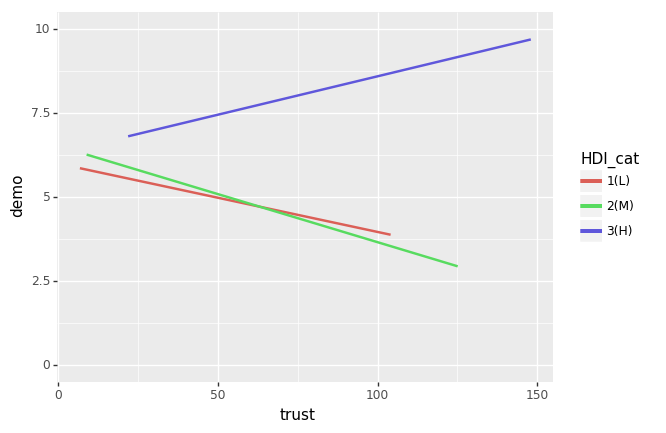

<ggplot: (3841235)>

In [112]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo', color='HDI_cat')) + \
    geom_smooth(method='lm', se=False) + \
    ylim([0,10])

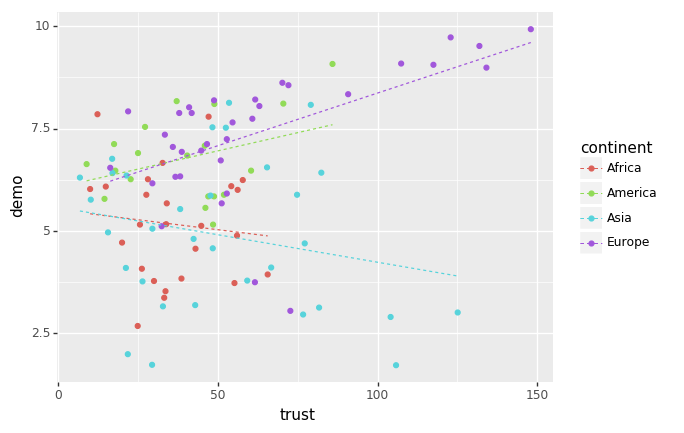

<ggplot: (13875432)>

In [107]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo', color='continent')) + \
    geom_point() + \
    geom_smooth(method='lm', se=False, size=0.5, linetype='dotted')

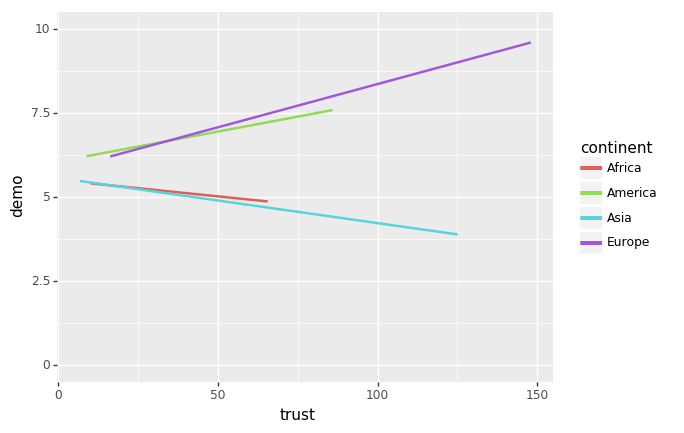

<ggplot: (-9223372036840363527)>

In [108]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo', color='continent')) + \
    geom_smooth(method='lm', se=False) + \
    ylim([0,10])

# 2 - create one plot per continent, HDI_cat combination


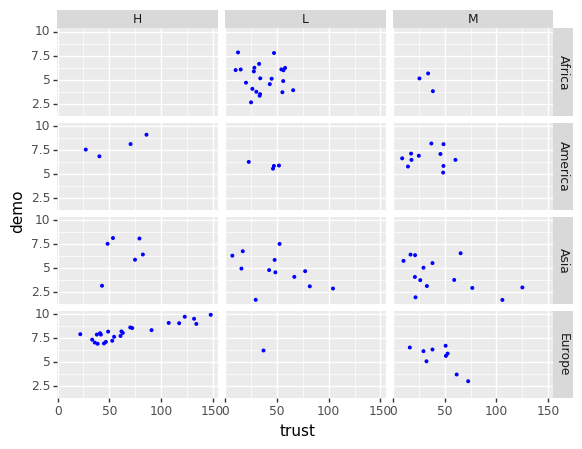

<ggplot: (-9223372036841175324)>

In [109]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo')) + \
    geom_point(color='blue', size=0.6) + \
    facet_grid(facets=['continent', 'HDI_cat'])

### problem
The order H,L,M (High, Low, Medium) should be L,M,H

In [110]:
#--- change H into 3(H), L into 1(L) and M into 2(M)
def get_new_HDI_cat_value(HDI_cat):
    if   HDI_cat == 'H' : return '3(H)'
    elif HDI_cat == 'M' : return '2(M)'
    elif HDI_cat == 'L' : return '1(L)'
    else: return None

hdi['HDI_cat'] = hdi['HDI_cat'].apply(get_new_HDI_cat_value) 

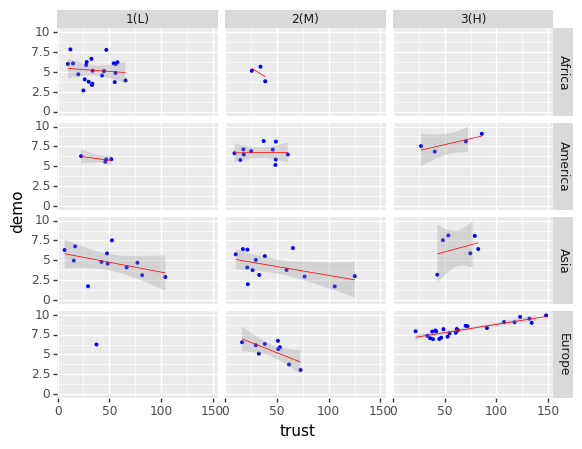

<ggplot: (-9223372036841259078)>

In [113]:
ggplot(data=hdi, mapping=aes(x='trust', y='demo')) + \
    geom_point(color='blue', size=0.6) + \
    geom_smooth(method='lm', color='red', alpha=0.3, size=0.3) + \
    ylim([0,10]) + \
    facet_grid(facets=['continent', 'HDI_cat'])

# Aesthetics

facet_wrap has as properties:

- facets=... ---- categorical variable use to separate on
- nrow= ... ----- number of rows in the output
- ncol= ... ----- number of columns in the output  
For more see the appendix below
 
**Note** color, linetype and size do not work.

## Appendix - the docstring of the plotnine function facet_grid()

    """
    
     Parameters
    ----------
    facets : formula | tuple | list
        A formula with the rows (of the tabular display) on
        the LHS and the columns (of the tabular display) on
        the RHS; the dot in the formula is used to indicate
        there should be no faceting on this dimension
        (either row or column). If a tuple/list is used, it
        must of size two, the elements of which must be
        strings or lists.
    scales : 'fixed' | 'free' | 'free_x' | 'free_y'
        Whether ``x`` or ``y`` scales should be allowed (free)
        to vary according to the data on each of the panel.
        Default is ``'fixed'``.
    space : 'fixed' | 'free' | 'free_x' | 'free_y'
        Whether the ``x`` or ``y`` sides of the panels
        should have the size. It also depends to the
        ``scales`` parameter. Default is ``'fixed'``.
        This setting is not properly supported at the moment.
    shrink : bool
        Whether to shrink the scales to the output of the
        statistics instead of the raw data. Default is ``True``.
    labeller : str | function
        How to label the facets. If it is a ``str``, it should
        be one of ``'label_value'`` ``'label_both'`` or
        ``'label_context'``. Default is ``'label_value'``
    as_table : bool
        If ``True``, the facets are laid out like a table with
        the highest values at the bottom-right. If ``False``
        the facets are laid out like a plot with the highest
        value a the top-right. Default it ``True``.
    drop : bool
        If ``True``, all factor levels not used in the data
        will automatically be dropped. If ``False``, all
        factor levels will be shown, regardless of whether
        or not they appear in the data. Default is ``True``.
    """